# **Model Notebook for _Bald Head Detector_**

In [50]:
## Import Libraries

import pandas as pd

import tensorflow as tf

import numpy as np

import seaborn as sns
import cv2
from matplotlib import pyplot as plt

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import utils

import scipy
from scipy import stats
from scipy.stats import norm

from pathlib import Path
import os.path

import itertools

import skimage

import random

#### **Load Data**

In [3]:
base_dir="C:\\Users\\Abhinay\\OneDrive\\Documents\\Bald_Head_Detection\\archive (11)\\Dataset\\"

In [4]:
train_path=base_dir+"Train\\"
test_path=base_dir+"Test\\"
val_path=base_dir+"Validation\\"

In [5]:
os.listdir(train_path)

['Bald', 'NotBald']

In [6]:
os.listdir(test_path)

['Bald', 'NotBald']

In [7]:
os.listdir(val_path)

['Bald', 'NotBald']

In [9]:
train_bald_path=train_path+"Bald\\"
train_notbald_path=train_path+"NotBald\\"
test_bald_path=test_path+"Bald\\"
test_notbald_path=test_path+"NotBald\\"
val_bald_path=val_path+"Bald\\"
val_notbald_path=val_path+"NotBald\\"

In [10]:
print("No of bald head images in Train Dataset:",len(os.listdir(train_bald_path)))
print("No of NotBald head images in Train Dataset:",len(os.listdir(train_notbald_path)))
print("No of bald head images in Test Dataset:",len(os.listdir(test_bald_path)))
print("No of NotBald head images in Test Dataset:",len(os.listdir(test_notbald_path)))
print("No of bald head images in Validation Dataset:",len(os.listdir(val_bald_path)))
print("No of NotBald head images in Validation Dataset:",len(os.listdir(val_notbald_path)))

No of bald head images in Train Dataset: 3656
No of NotBald head images in Train Dataset: 156344
No of bald head images in Test Dataset: 421
No of NotBald head images in Test Dataset: 19579
No of bald head images in Validation Dataset: 470
No of NotBald head images in Validation Dataset: 22129


In [11]:
print("Displaying content of Bald Folder")

os.listdir(train_bald_path)

Displaying content of Bald Folder


['000051.jpg',
 '000079.jpg',
 '000115.jpg',
 '000125.jpg',
 '000134.jpg',
 '000182.jpg',
 '000209.jpg',
 '000226.jpg',
 '000299.jpg',
 '000306.jpg',
 '000386.jpg',
 '000402.jpg',
 '000425.jpg',
 '000623.jpg',
 '000729.jpg',
 '000846.jpg',
 '000902.jpg',
 '000905.jpg',
 '000907.jpg',
 '000926.jpg',
 '000938.jpg',
 '000969.jpg',
 '001072.jpg',
 '001100.jpg',
 '001105.jpg',
 '001117.jpg',
 '001149.jpg',
 '001192.jpg',
 '001207.jpg',
 '001208.jpg',
 '001270.jpg',
 '001322.jpg',
 '001368.jpg',
 '001383.jpg',
 '001398.jpg',
 '001400.jpg',
 '001471.jpg',
 '001490.jpg',
 '001519.jpg',
 '001655.jpg',
 '001656.jpg',
 '001669.jpg',
 '001684.jpg',
 '001706.jpg',
 '001742.jpg',
 '001759.jpg',
 '001766.jpg',
 '001917.jpg',
 '001924.jpg',
 '001978.jpg',
 '001999.jpg',
 '002004.jpg',
 '002030.jpg',
 '002081.jpg',
 '002124.jpg',
 '002132.jpg',
 '002188.jpg',
 '002191.jpg',
 '002276.jpg',
 '002305.jpg',
 '002327.jpg',
 '002341.jpg',
 '002359.jpg',
 '002363.jpg',
 '002505.jpg',
 '002516.jpg',
 '002528.j

In [12]:
print("Displaying content of NotBald Folder")

os.listdir(train_notbald_path)

Displaying content of NotBald Folder


['000001.jpg',
 '000002.jpg',
 '000003.jpg',
 '000004.jpg',
 '000005.jpg',
 '000006.jpg',
 '000007.jpg',
 '000008.jpg',
 '000009.jpg',
 '000010.jpg',
 '000011.jpg',
 '000012.jpg',
 '000013.jpg',
 '000014.jpg',
 '000015.jpg',
 '000016.jpg',
 '000017.jpg',
 '000018.jpg',
 '000019.jpg',
 '000020.jpg',
 '000021.jpg',
 '000022.jpg',
 '000023.jpg',
 '000024.jpg',
 '000025.jpg',
 '000026.jpg',
 '000027.jpg',
 '000028.jpg',
 '000029.jpg',
 '000030.jpg',
 '000031.jpg',
 '000032.jpg',
 '000033.jpg',
 '000034.jpg',
 '000035.jpg',
 '000036.jpg',
 '000037.jpg',
 '000038.jpg',
 '000039.jpg',
 '000040.jpg',
 '000041.jpg',
 '000042.jpg',
 '000043.jpg',
 '000044.jpg',
 '000045.jpg',
 '000046.jpg',
 '000047.jpg',
 '000048.jpg',
 '000049.jpg',
 '000050.jpg',
 '000052.jpg',
 '000053.jpg',
 '000054.jpg',
 '000055.jpg',
 '000056.jpg',
 '000057.jpg',
 '000058.jpg',
 '000059.jpg',
 '000060.jpg',
 '000061.jpg',
 '000062.jpg',
 '000063.jpg',
 '000064.jpg',
 '000065.jpg',
 '000066.jpg',
 '000067.jpg',
 '000068.j

#### **Data Visualization**

In [13]:
from skimage.io import imread

In [14]:
## Access an image from Bald

print("Accessing an image of Bald head person")
os.listdir(train_bald_path)[3]

Accessing an image of Bald head person


'000125.jpg'

In [15]:
'''Displaying a Bald Head Person Image'''

bald=train_bald_path+'000125.jpg'
imread(bald).shape

(218, 178, 3)

Displaying Image


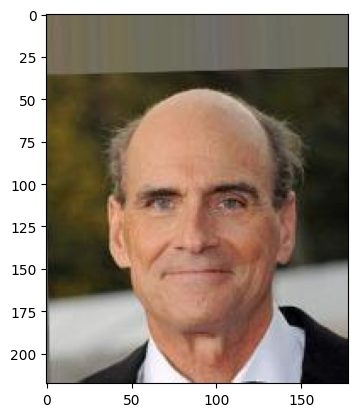

In [16]:
print("Displaying Image")
plt.imshow(imread(bald))

In [17]:
## Access an image from NotBald

print("Accessing an image of Not Bald head person")
os.listdir(train_notbald_path)[25]

Accessing an image of Not Bald head person


'000026.jpg'

In [18]:
'''Displaying a Not Bald Head Person Image'''

notbald=train_notbald_path+'000026.jpg'
imread(notbald).shape

(218, 178, 3)

Displaying Image


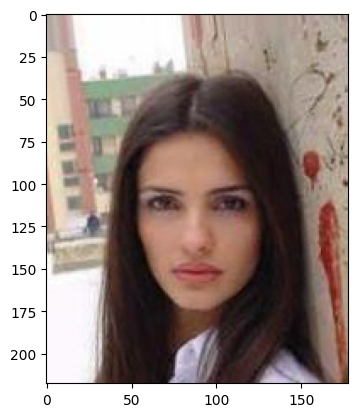

In [19]:
print("Displaying Image")
plt.imshow(imread(notbald))

In [20]:
## Converting images and assigned labels into a Dataframe 

train_folder = train_path
all_data = []
for folder in os.listdir(train_folder):
    
    label_folder = os.path.join(train_folder, folder)
    onlyfiles = [{'Path':os.path.join(label_folder, f),'Label':folder} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    all_data += onlyfiles
df = pd.DataFrame(all_data)
df

,Path,Label
0,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,Bald
1,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,Bald
2,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,Bald
3,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,Bald
4,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,Bald
...,...,...
159995,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,NotBald
159996,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,NotBald
159997,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,NotBald
159998,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,NotBald


In [21]:
a = df.value_counts('Label')
a

Label
NotBald    156344
Bald         3656
Name: count, dtype: int64

In [22]:
## Converting images and assigned labels into a Dataframe 

test_folder = test_path
all_data = []
for folder in os.listdir(test_folder):
    
    label_folder = os.path.join(test_folder, folder)
    onlyfiles = [{'Path':os.path.join(label_folder, f),'Label':folder} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    all_data += onlyfiles
df1 = pd.DataFrame(all_data)
df1

,Path,Label
0,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,Bald
1,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,Bald
2,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,Bald
3,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,Bald
4,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,Bald
...,...,...
19995,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,NotBald
19996,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,NotBald
19997,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,NotBald
19998,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,NotBald


In [23]:
b = df1['Label'].value_counts()
b

Label
NotBald    19579
Bald         421
Name: count, dtype: int64

In [24]:
## Converting images and assigned labels into a Dataframe 

val_folder = val_path
all_data = []
for folder in os.listdir(val_folder):
    
    label_folder = os.path.join(val_folder, folder)
    onlyfiles = [{'Path':os.path.join(label_folder, f),'Label':folder} for f in os.listdir(label_folder) if os.path.isfile(os.path.join(label_folder, f))]
    all_data += onlyfiles
df2 = pd.DataFrame(all_data)
df2

,Path,Label
0,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,Bald
1,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,Bald
2,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,Bald
3,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,Bald
4,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,Bald
...,...,...
22594,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,NotBald
22595,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,NotBald
22596,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,NotBald
22597,C:\Users\Abhinay\OneDrive\Documents\Bald_Head_...,NotBald


In [25]:
c = df2['Label'].value_counts()
c

Label
NotBald    22129
Bald         470
Name: count, dtype: int64

In [26]:
classes = ['NotBald', 'Bald']

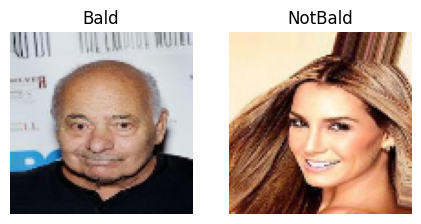

In [27]:
def load_and_display_unique_images():
    image_size = (100,100)
    unique_images = []  # List to store unique images
    unique_labels = []  # List to store corresponding labels

    # Iterate through the folders in the training directory
    for folder in os.listdir(train_path):
        for file in os.listdir(os.path.join(train_path, folder)):
            file_path = os.path.join(train_path, folder, file)
            image = cv2.imread(file_path)
            final_image = cv2.resize(image, image_size)
            final_image = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)
            
            # Append the unique image and its label
            unique_images.append(final_image)
            unique_labels.append(folder)
            break  # Only load one image per category

    return unique_images, unique_labels

# Load unique images and their labels
unique_images, unique_labels = load_and_display_unique_images()

# Display the unique images and their labels in a grid
fig = plt.figure(figsize=(8,8))
def plot_image(fig, image, label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(image)
    plt.title(label)

image_index = 0
rows, cols = 1,3
for i in range(1, (rows * cols)):
    plot_image(fig, unique_images[image_index], unique_labels[image_index], rows, cols, i)
    image_index += 1

plt.show()

C:\Users\Abhinay\AppData\Local\Temp\ipykernel_12400\700110679.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =(vc.index), y = vc,palette="rocket",legend=False)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Label
NotBald    156344
Bald         3656
Name: count, dtype: int64


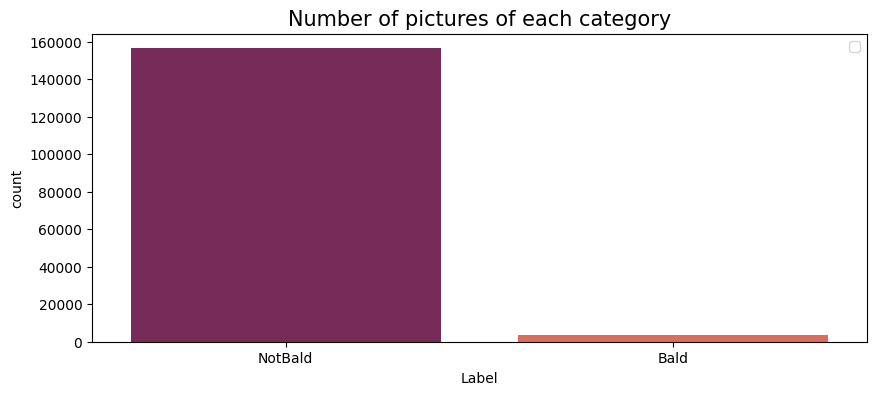

In [28]:
## Plotting count of images per each label in Train data

vc = df['Label'].value_counts()
print(vc)
plt.figure(figsize=(10,4))
sns.barplot(x =(vc.index), y = vc,palette="rocket",legend=False)
plt.title("Number of pictures of each category", fontsize = 15)
plt.legend()
plt.show()

C:\Users\Abhinay\AppData\Local\Temp\ipykernel_12400\2525965237.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =(vc1.index), y = vc1,palette="Spectral")


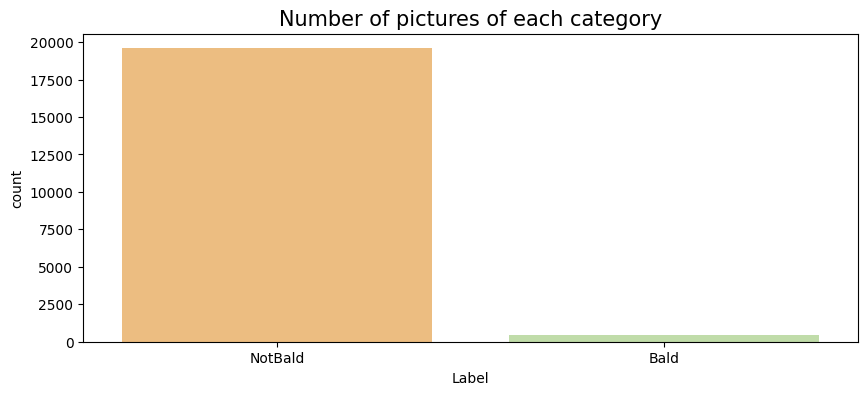

In [29]:
## Plotting count of images per each label in Train data

vc1 = df1['Label'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x =(vc1.index), y = vc1,palette="Spectral")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

C:\Users\Abhinay\AppData\Local\Temp\ipykernel_12400\3382686569.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = (vc2.index), y = (vc2),palette="rocket")


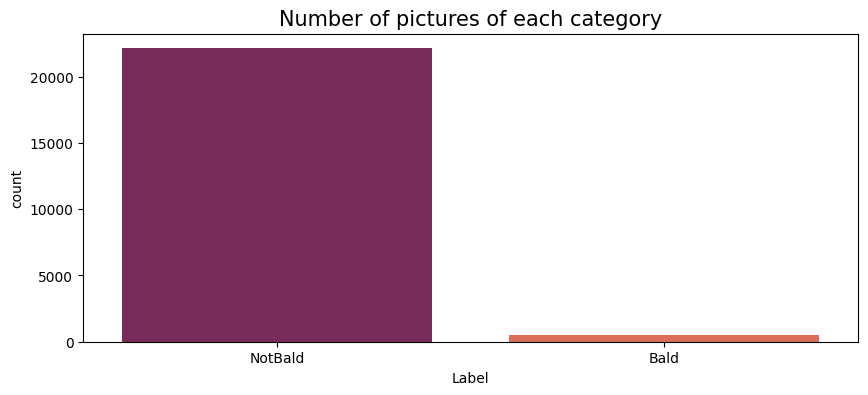

In [30]:
## Plotting count of images per each label in Train data

vc2 = df2['Label'].value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x = (vc2.index), y = (vc2),palette="rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

#### **Data Pre-processing**

In [33]:
imread(bald).max()

255

In [34]:
'''Reshaping is done in cells'''
image_gen=ImageDataGenerator(rescale=1/255,shear_range=0.1,zoom_range=0.1,fill_mode='nearest')

In [35]:
image_gen.flow_from_directory(train_path)

Found 160000 images belonging to 2 classes.


In [36]:
image_gen.flow_from_directory(test_path)

Found 20000 images belonging to 2 classes.


In [37]:
image_gen.flow_from_directory(val_path)

Found 22599 images belonging to 2 classes.


In [38]:
image_shape=(200,200,3)

#### **Defining Neural Network _(CNN)_**

In [51]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [52]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [76]:
train_image_gen = image_gen.flow_from_directory(train_path,target_size=image_shape[:2],color_mode='rgb',batch_size=64,class_mode='binary')

Found 160000 images belonging to 2 classes.


In [77]:
test_image_gen = image_gen.flow_from_directory(val_path,target_size=image_shape[:2],color_mode='rgb', batch_size=64,class_mode='binary',shuffle=False)

Found 22599 images belonging to 2 classes.


In [78]:
train_image_gen.class_indices

{'Bald': 0, 'NotBald': 1}

In [80]:
history=model.fit(train_image_gen,epochs=1,batch_size=32,validation_data=test_image_gen,validation_split=0.8,callbacks=[early_stop])

2500/2500 [==============================] - 5218s 2s/step - loss: 0.0608 - accuracy: 0.9776 - val_loss: 0.0496 - val_accuracy: 0.9796


In [81]:
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,0.060828,0.977594,0.049617,0.979557


#### **Accuracy and Loss**

In [85]:
# Model Evaluation
evaluate_metrics = model.evaluate(test_image_gen,verbose=0)

# Print the evaluation results
print("Evaluation Accuracy = {:.2f}%".format(evaluate_metrics[1] * 100))
print("Evaluation Loss = {:.6f}".format(evaluate_metrics[0]))

Evaluation Accuracy = 97.98%
Evaluation Loss = 0.049516


In [86]:
pred=model.predict(test_image_gen)
pred

354/354 [==============================] - 204s 577ms/step


array([[0.547918  ],
       [0.49453804],
       [0.62174153],
       ...,
       [0.99997896],
       [0.99999547],
       [0.99978954]], dtype=float32)

In [91]:
'''Considering aboove Probabilities: If prob>0.5 Consider as Pedestrian and prob<0.5 Consider as No Pedestrian'''

predictions=pred>0.5

In [92]:
predictions[:5]

array([[ True],
       [False],
       [ True],
       [ True],
       [ True]])

In [130]:
test_image_gen.classes[0:1000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [136]:
if len(pred.shape) > 1: 
  predicted_classes = np.argmax(pred, axis=1) 
else:
  predicted_classes = pred.round()

print("Predicted labels:", predicted_classes)
len(predicted_classes)

Predicted labels: [0 0 0 ... 0 0 0]


22599

In [88]:
from sklearn.metrics import classification_report,confusion_matrix

In [93]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.60      0.06      0.10       470
           1       0.98      1.00      0.99     22129

    accuracy                           0.98     22599
   macro avg       0.79      0.53      0.55     22599
weighted avg       0.97      0.98      0.97     22599



<Axes: >

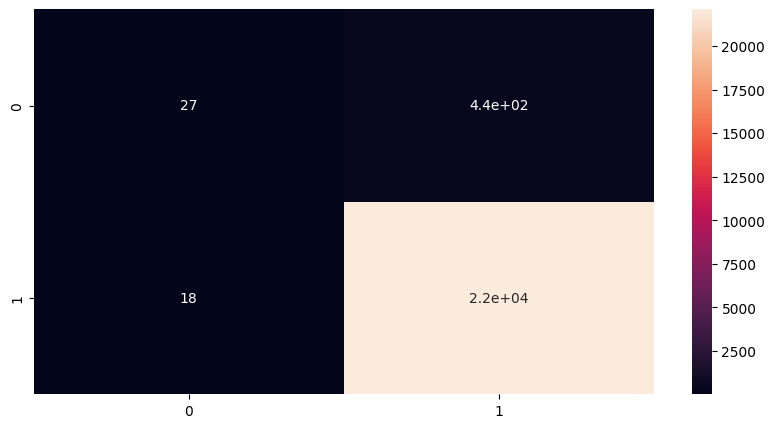

In [95]:
results=confusion_matrix(test_image_gen.classes,predictions)
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(results,annot=True)

In [132]:
## SAVE THE MODEL 

from keras.models import load_model
model.save('Bald_Detector.h5')